## EMPLOYEE BURNOUT PREDICTION

In [2]:
# now importing all libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# here file takes from file explorer to read the file.
data=pd.read_excel('employee_burnout_analysis-AI.xlsx')
print(data)

                    Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2                  3.0   
1        

In [4]:
#here it prints first five elements on the file.
print(data.head())

                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52  


In [5]:
#here prints last five elements on thefile.
print(data.tail())

                    Employee ID Date of Joining  Gender Company Type  \
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   

In [6]:
# here info of the file.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
# shape of the file.
data.shape

(22750, 9)

In [8]:
# Summary Statistics for the Diabetes Dataset.
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


# Data processing: Treating the missing values

In [9]:
#Identifying the mean of the features
print(data['Designation'].mean())
print(data['Resource Allocation'].mean())
print(data['Mental Fatigue Score'].mean())
print(data['Burn Rate'].mean())

2.1787252747252746
4.481398287238523
5.728187854407972
0.4520054563950802


In [10]:
# Finding the number of rows which has the null values
print('Designation-',len(data['Designation'][data['Designation']==0]))
print('Resource Allocation-',len(data['Resource Allocation'][data['Resource Allocation']==0]))
print('Mental Fatigue Score-',len(data['Mental Fatigue Score'][data['Mental Fatigue Score']==0]))
print('Burn Rate-',len(data['Burn Rate'][data['Burn Rate']==0]))

Designation- 1507
Resource Allocation- 0
Mental Fatigue Score- 171
Burn Rate- 272


In [11]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


In [12]:
# Finding the null value percentage
selected_columns = ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Designation             6.624176
Resource Allocation     0.000000
Mental Fatigue Score    0.751648
Burn Rate               1.195604
dtype: float64


In [13]:
# Replacing the null values with the mean
data['Designation']=data['Designation'].replace([0],[data['Designation'].mean()])
data['Resource Allocation']=data['Resource Allocation'].replace([0],[data['Resource Allocation'].mean()])
data['Mental Fatigue Score']=data['Mental Fatigue Score'].replace([0],[data['Mental Fatigue Score'].mean()])
data['Burn Rate']=data['Burn Rate'].replace([0],[data['Burn Rate'].mean()])

In [14]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Designation             0.0
Resource Allocation     0.0
Mental Fatigue Score    0.0
Burn Rate               0.0
dtype: float64


In [15]:
# detecting outliers
columns=data[selected_columns]

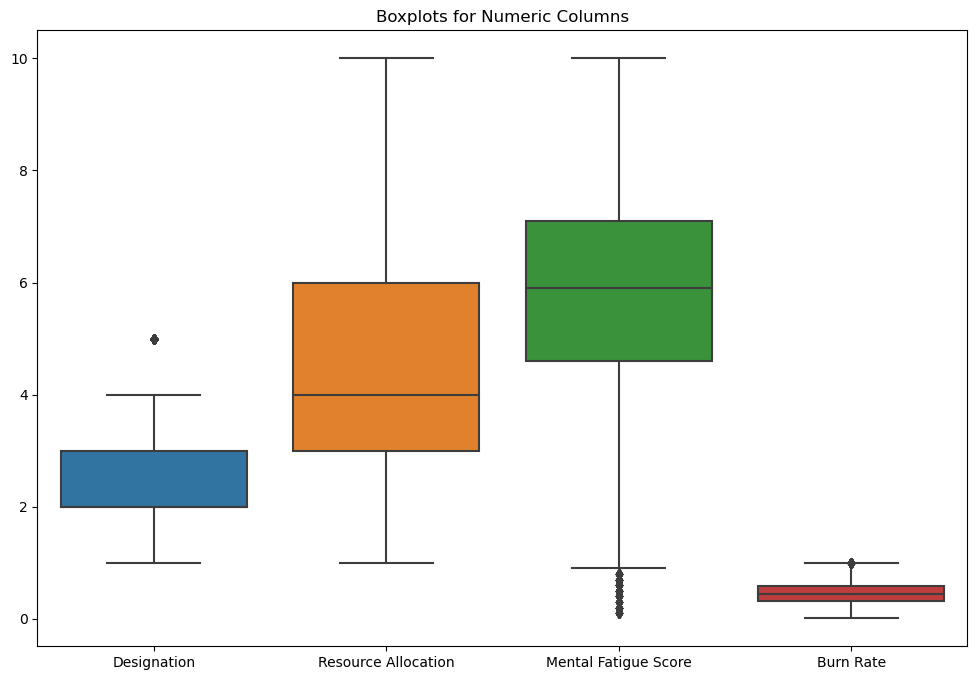

In [16]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [17]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Designation' column: 398
Number of outliers in the 'Resource Allocation' column: 0
Number of outliers in the 'Mental Fatigue Score' column: 176
Number of outliers in the 'Burn Rate' column: 85


In [18]:
# Outlier treatment
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Designation             2.00
Resource Allocation     3.00
Mental Fatigue Score    3.10
Burn Rate               0.33
dtype: float64


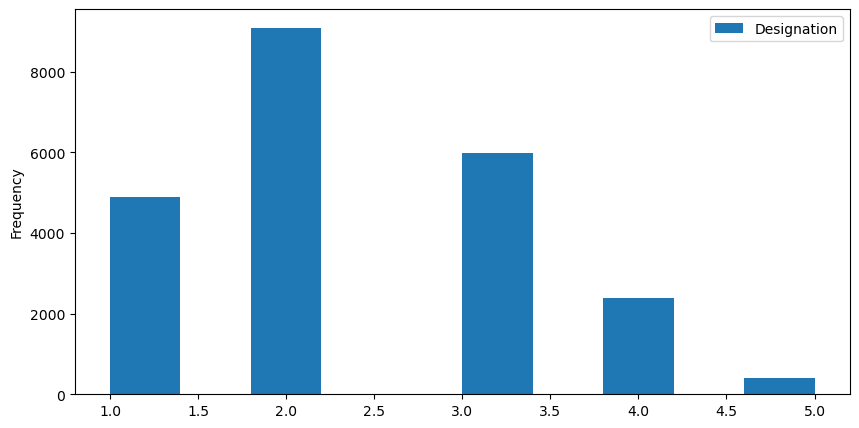

In [19]:
data['Designation'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

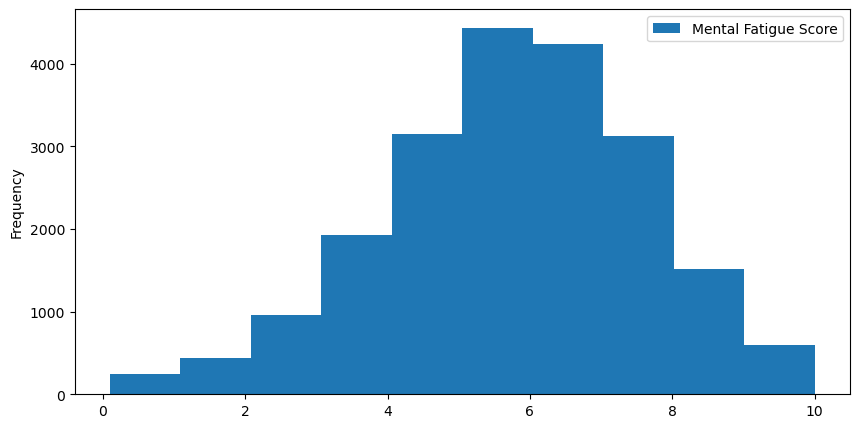

In [20]:
data['Mental Fatigue Score'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

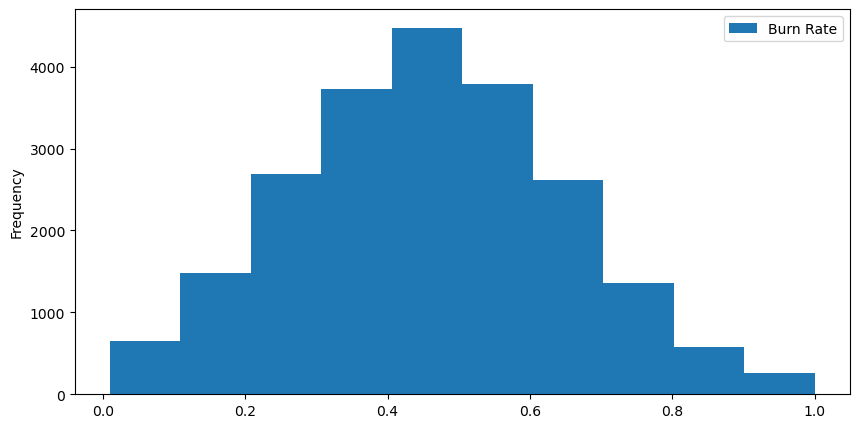

In [21]:
data['Burn Rate'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

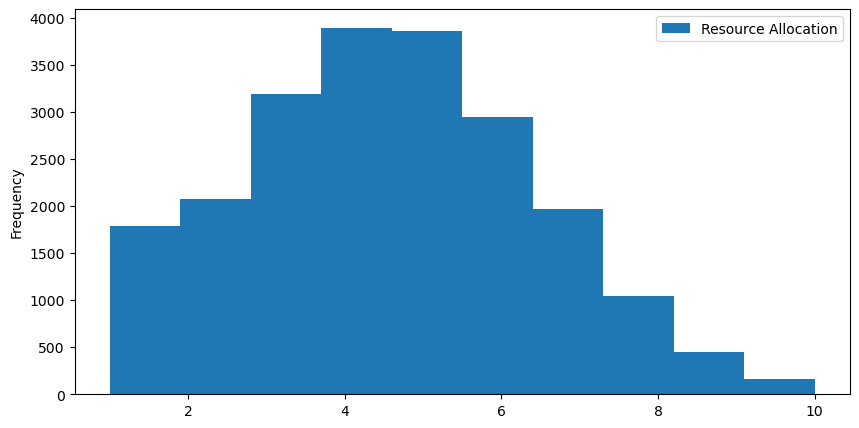

In [22]:
data['Resource Allocation'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

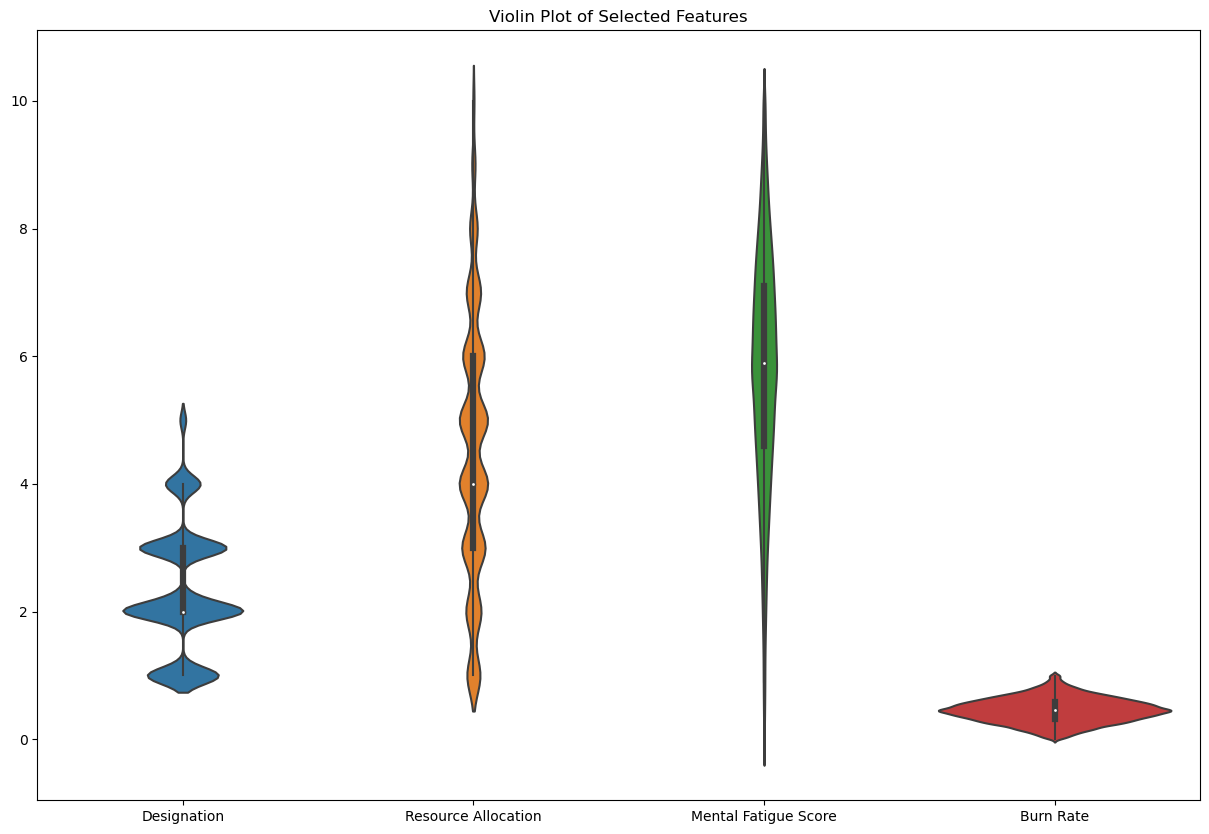

In [23]:
# Violin plot of selected features.
plt.figure(figsize=(15, 10))
sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot of Selected Features")
plt.show()

#### The violin plot shows the distribution of four numerical features: Designation,	Resource Allocation,	Mental Fatigue Score,Burn Rate. The violin shape represents the probability density function (PDF) of each feature, and the box plot embedded within each violin plot shows the median, interquartile range (IQR), and outliers.

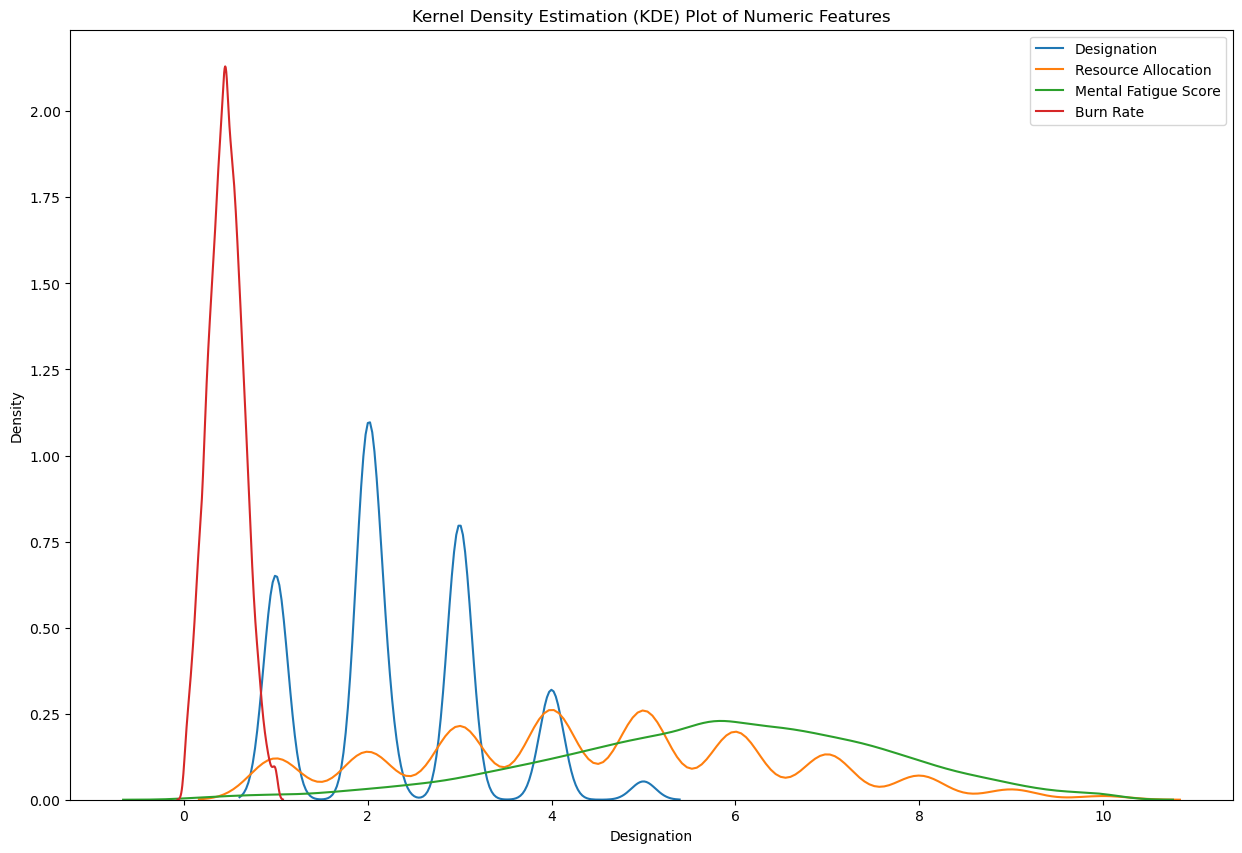

In [24]:
plt.figure(figsize=(15, 10))
for column in selected_columns:
    sns.kdeplot(data[column], label=column)
plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features")
plt.legend()
plt.show()

#### The image shows a Kernel Density Estimation (KDE) plot of four numerical features:  Designation, Resource Allocation, Mental Fatigue Score,Burn Rate. KDE is a non-parametric method for estimating the probability density function (PDF) of a random variable. The KDE plot shows the estimated PDF of each feature, which can be used to visualize the distribution of the data.

In [25]:
#Creating a count (frequency) plot describing the data types and the count of variables.
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                    float64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [26]:
data.dtypes.value_counts()

object            4
float64           4
datetime64[ns]    1
dtype: int64

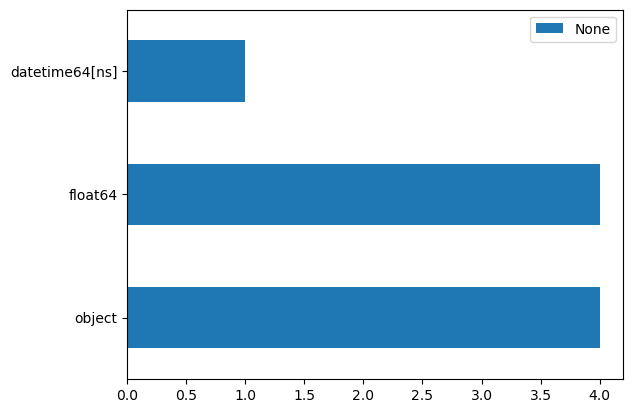

In [27]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

In [28]:
# Data Exploration
data['WFH Setup Available'].value_counts()

Yes    12290
No     10460
Name: WFH Setup Available, dtype: int64

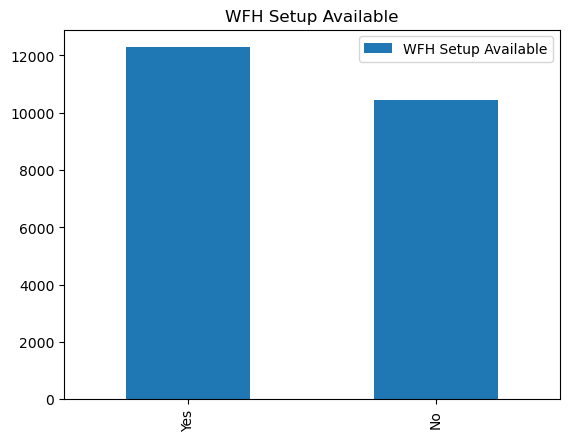

In [29]:
data['WFH Setup Available'].value_counts().plot(kind='bar')
plt.legend()
plt.title('WFH Setup Available')
plt.show()

In [30]:
outcome=(data['WFH Setup Available'].value_counts()/data['WFH Setup Available'].shape)*100
outcome

Yes    54.021978
No     45.978022
Name: WFH Setup Available, dtype: float64

In [31]:
# Data Exploration
data['Company Type'].value_counts()

Service    14833
Product     7917
Name: Company Type, dtype: int64

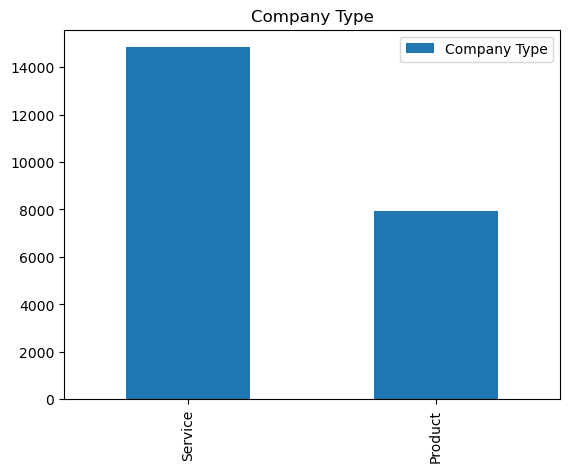

In [32]:
data['Company Type'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Company Type')
plt.show()

In [33]:
outcome1=(data['Company Type'].value_counts()/data['WFH Setup Available'].shape)*100
outcome1

Service    65.2
Product    34.8
Name: Company Type, dtype: float64

In [34]:
balanced_data=100-outcome
balanced_data

Yes    45.978022
No     54.021978
Name: WFH Setup Available, dtype: float64

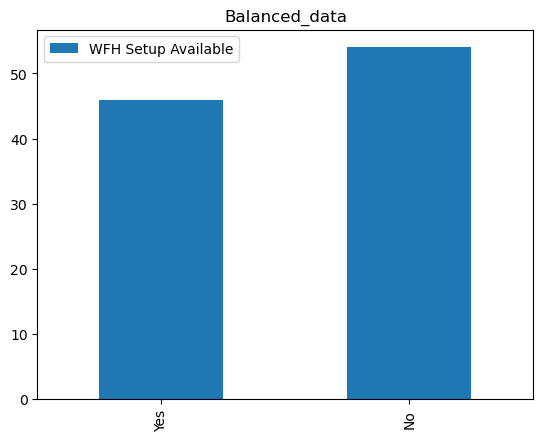

In [35]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')
plt.show()

###  Findings and plan future course of action.

 - We can see It's a Imbalance dataset,This shows that a dataset is biased towards a class(0) in the dataset. If the dataset is biased towards one class, an algorithm trained on the same data will be biased towards the same class,so first we have to balance it.
 - We can use Resampling or SMOTE to balance a dataset.

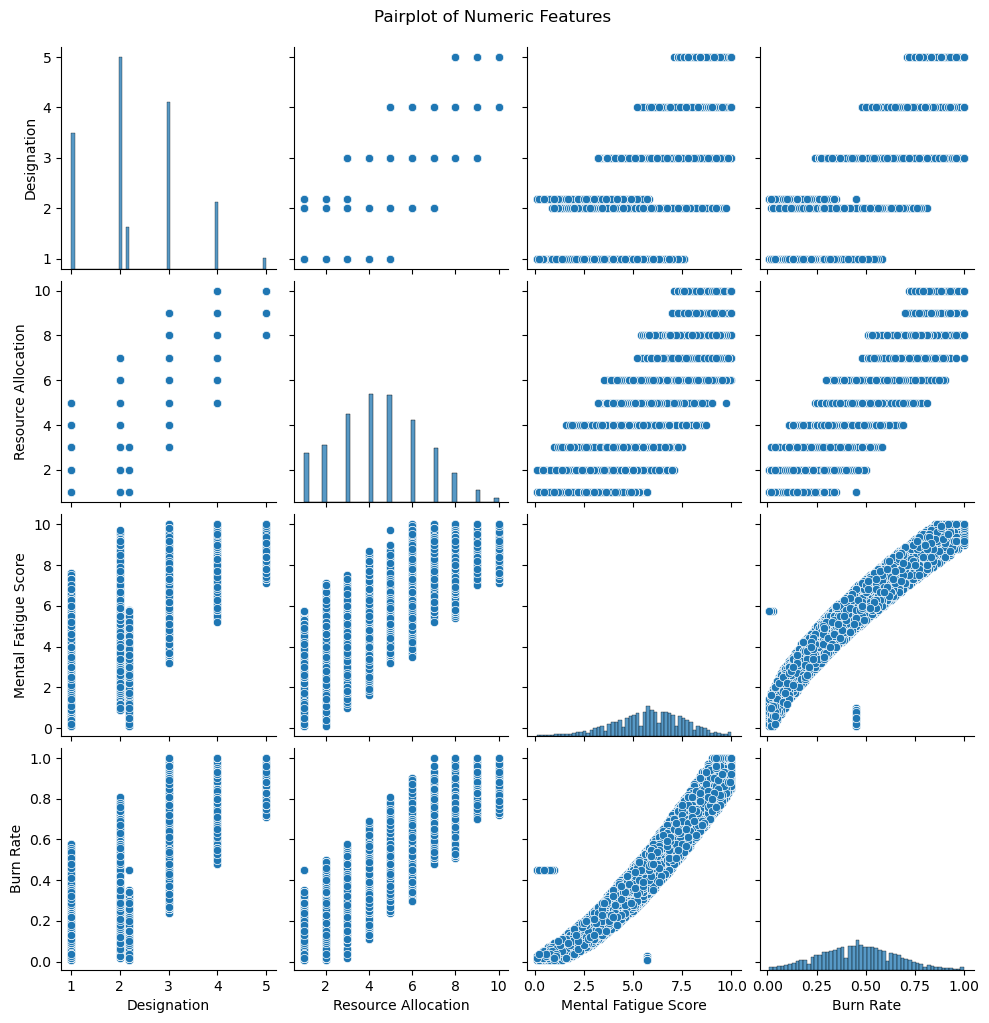

In [36]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

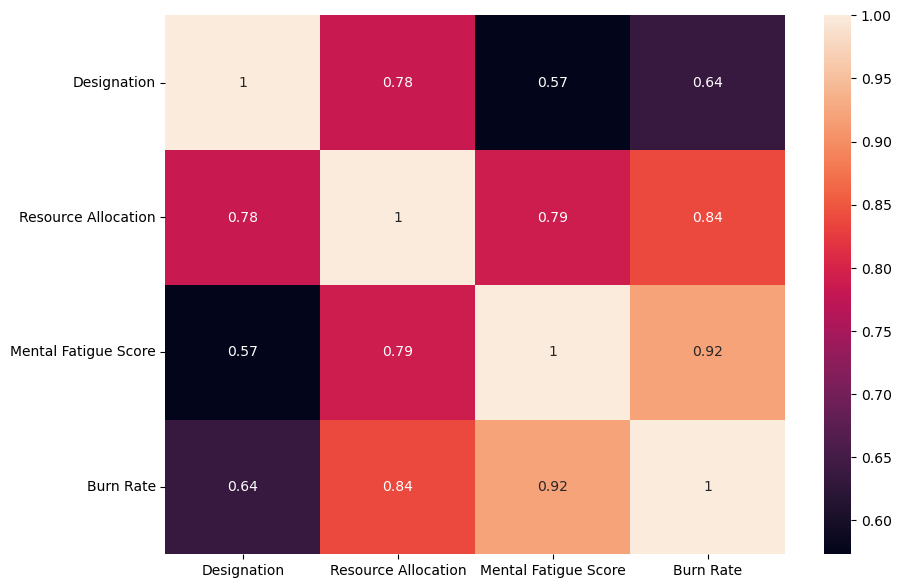

In [61]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [40]:
# Bivariate Analysis Example: Burnout vs. Stress Level
if 'Stress_Level' in data.columns:
    sns.boxplot(data, x='Burn Rate', y='Stress_Level', palette='Set2')
    plt.title("Stress Level vs Burn out")
    plt.show()

In [44]:
X = data.drop('Burn Rate', axis=1)  # Features
y = data['Burn Rate']  # Target

In [42]:
# Train-Test Split for Data Modeling
X_train,X_test,y_train,y_test=train_test_split(new_X,new_y,test_size=0.20,random_state=42)

In [45]:
X_train, X_test, y_train, y_test

(                    Employee ID Date of Joining  Gender Company Type  \
 17557          fffe390036003900      2008-12-03  Female      Service   
 6020       fffe3800350038003600      2008-04-18    Male      Service   
 1739   fffe33003300300036003600      2008-08-12    Male      Service   
 14712      fffe3500380031003700      2008-08-13  Female      Product   
 15387          fffe340032003900      2008-06-08  Female      Service   
 ...                         ...             ...     ...          ...   
 11964      fffe3100330039003300      2008-03-31  Female      Service   
 21575  fffe32003900380034003400      2008-04-04  Female      Product   
 5390   fffe32003600360039003200      2008-03-24  Female      Service   
 860        fffe3600380039003800      2008-08-30  Female      Service   
 15795      fffe3700330039003100      2008-07-10  Female      Product   
 
       WFH Setup Available  Designation  Resource Allocation  \
 17557                 Yes     3.000000                  5